In [1]:
import glob
import os
import pickle
import random
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
import scipy
import seaborn as sns
from matplotlib import ticker
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import NearestNeighbors

import extq
import prettypyplot as pplt

In [2]:
! source /project/dinner/scguo/upside2/sourceme.sh

In [3]:
# upside_path = os.environ["UPSIDE_HOME"]
upside_path = "/project/dinner/scguo/upside2/"
upside_utils_dir = os.path.expanduser(upside_path + "/py")
sys.path.insert(0, upside_utils_dir)

In [4]:
plt.style.use("custom")  # custom style sheet
plt.style.use("vibrant")  # muted color theme from SciencePlots
pplt.load_cmaps()

In [5]:
plt.rcParams[
    "text.latex.preamble"
] = r"\usepackage{siunitx}\sisetup{detect-all}\usepackage{helvet}\usepackage{sansmath}\sansmath"
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = "cm"

# Load data

In [6]:
home_dir = "/project/dinner/scguo/kaiB/dga"

In [7]:
def load_rates(home_dir, temp):
    rate_gs2fs = np.load(f"{home_dir}/{temp}/dga_data/rates_gs2fs.npy")
    rate_gs2fs_withc = np.load(f"{home_dir}/{temp}/dga_data/rates_gs2fs_withc.npy")
    rate_fs2gs = np.load(f"{home_dir}/{temp}/dga_data/rates_fs2gs.npy")
    rate_fs2gs_withc = np.load(f"{home_dir}/{temp}/dga_data/rates_fs2gs_withc.npy")
    return rate_gs2fs, rate_gs2fs_withc, rate_fs2gs, rate_fs2gs_withc

In [8]:
rate87_gs2fs, rate87_gs2fs_withc, rate87_fs2gs, rate87_fs2gs_withc = load_rates(home_dir, 87)

In [9]:
rate89_gs2fs, rate89_gs2fs_withc, rate89_fs2gs, rate89_fs2gs_withc = load_rates(home_dir, 89)

In [10]:
rate91_gs2fs, rate91_gs2fs_withc, rate91_fs2gs, rate91_fs2gs_withc = load_rates(home_dir, 91)

In [11]:
rate_lags = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000], dtype=int)

In [81]:
def plot_rates(rate, rate_withc):
    f, axes = plt.subplots(ncols=3, figsize=(7, 2), dpi=300, sharex=True)
    for i, (r, r_withc) in enumerate(zip(rate, rate_withc)):
        axes[0].plot(rate_lags, r, "o-")
        axes[1].plot(rate_lags, r_withc, "o--")

        percent_through = r_withc / (r_withc + r)
        print(f"{percent_through[-2] * 100:.2f}")
        print(f"{(1 - percent_through[-2]) * 100:.2f}")
        axes[2].plot(rate_lags, percent_through, "o-", label="excluding unfolded")
        axes[2].plot(rate_lags, 1 - percent_through, "o--", label="overall", color=f"C{i}")

    axes[0].set_ylim([0, 5e-6])
    axes[1].set_ylim([0, 5e-5])
    for ax in axes:
        ax.set_xlabel("Lag")
        ax.set_xlim([10, 10000])
    axes[0].set_ylabel("Total flux overall")
    axes[1].set_ylabel("Total flux excluding unfolded")
    axes[2].set_ylabel("Percentage of flux")
    # axes[2].legend()
    f.legend(
        ["$q_+$", "$1 - q_-$", r"$\mathbf{1}_B$", r"$\mathbf{1}_{A^c}$"],
        loc="center",
        ncol=4,
        bbox_to_anchor=[0.5, 1.02],
    )
    plt.tight_layout()
    return f, axes

98.80
1.20
96.99
3.01
99.02
0.98
98.73
1.27


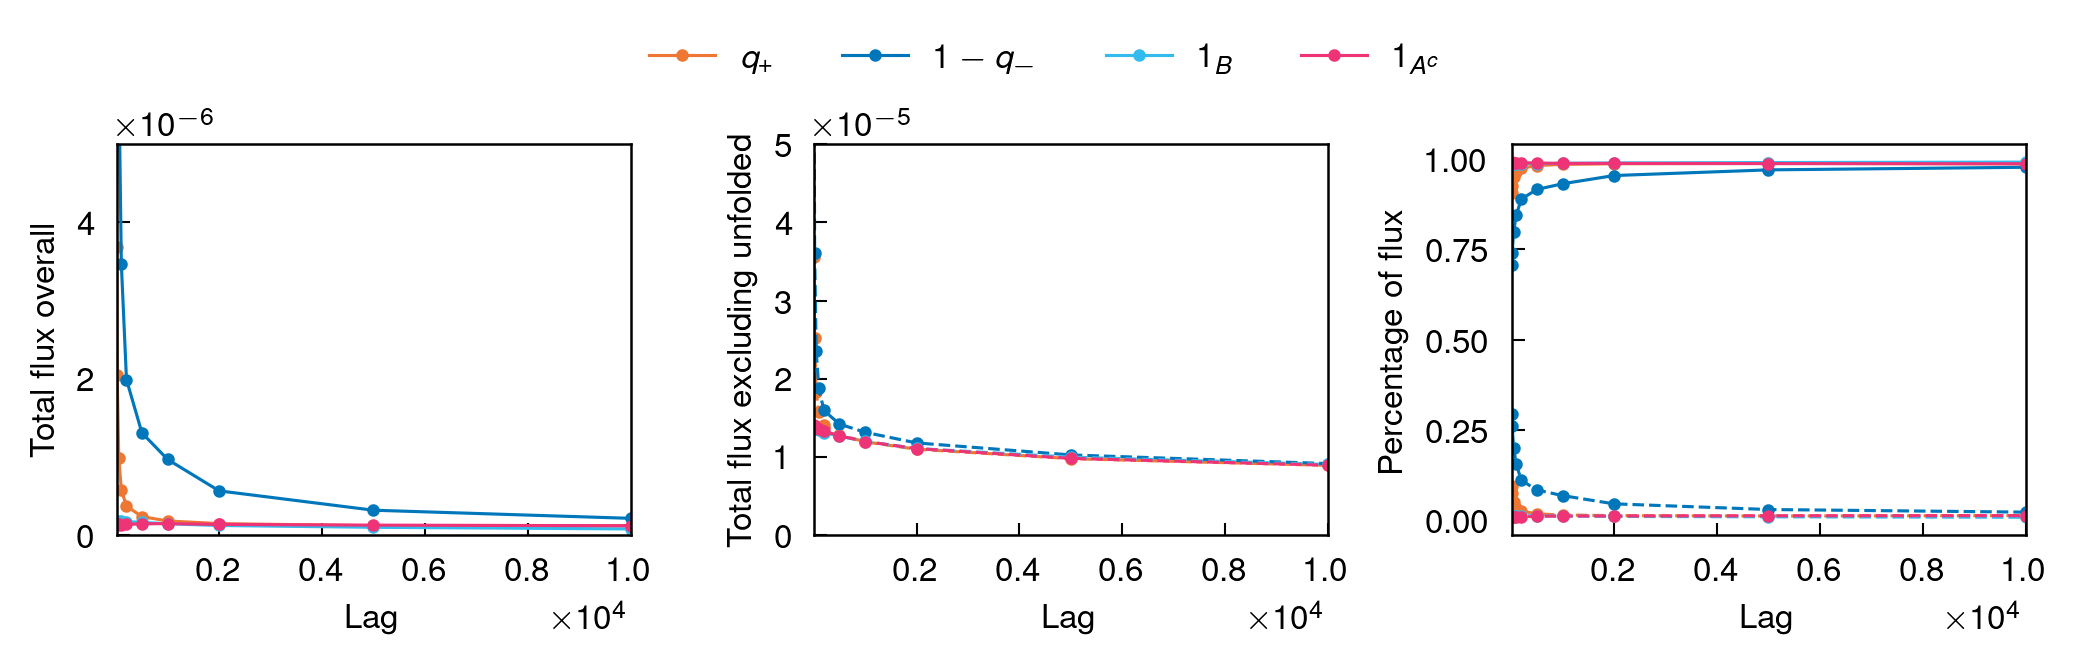

In [84]:
f, axes = plot_rates(rate87_fs2gs, rate87_fs2gs_withc)
f.savefig(f"{home_dir}/figures/flux_unfolded_t87.png", bbox_inches='tight')

99.35
0.65
97.18
2.82
100.54
-0.54
99.10
0.90


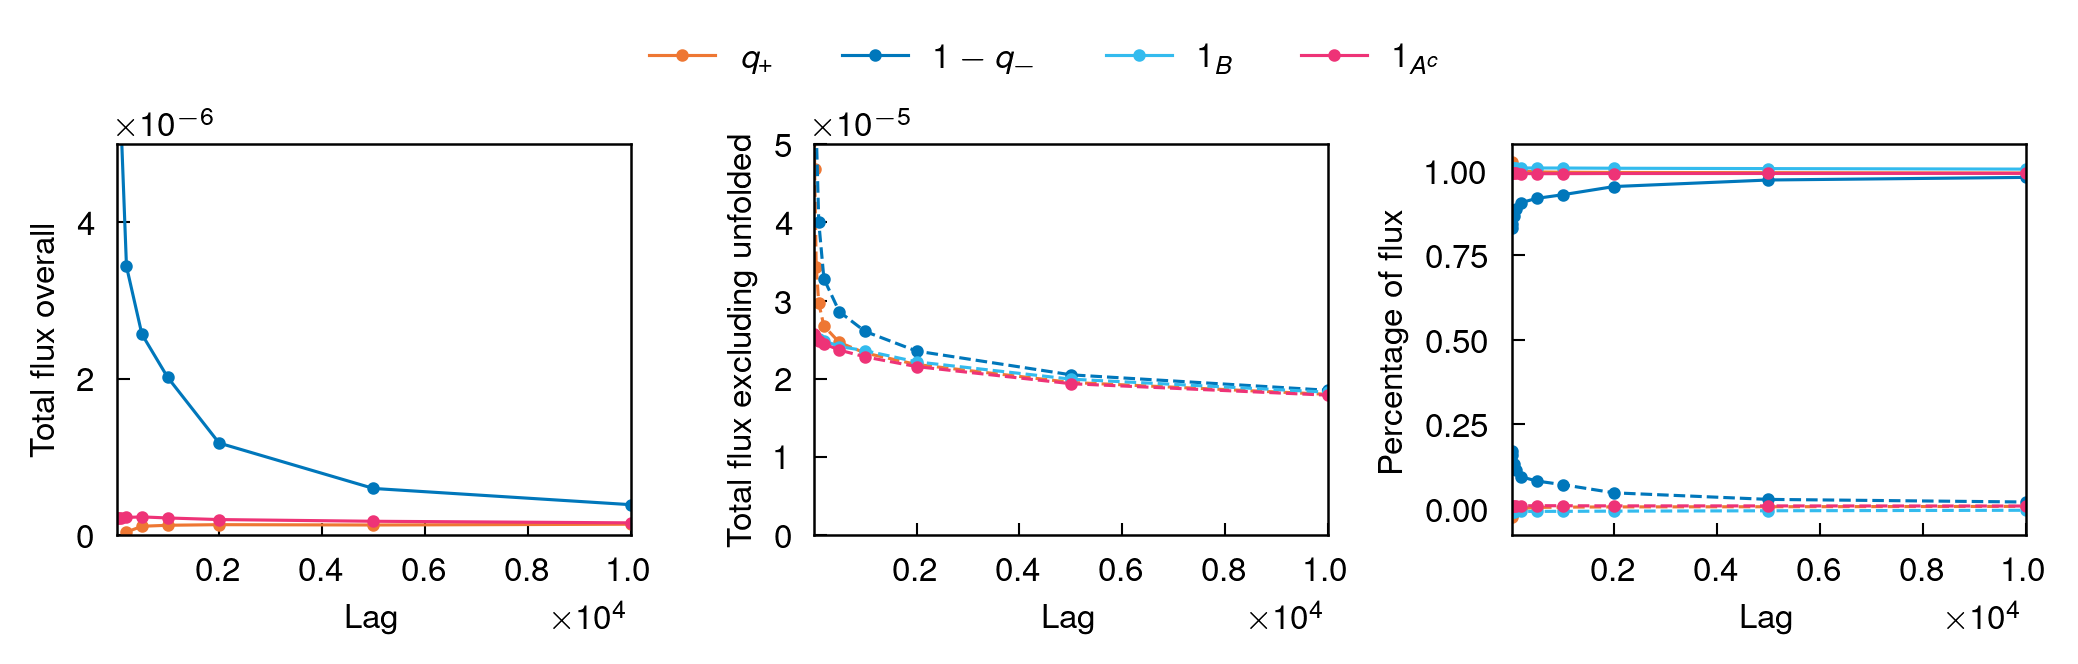

In [85]:
f, axes = plot_rates(rate89_fs2gs, rate89_fs2gs_withc)
f.savefig(f"{home_dir}/figures/flux_unfolded_t89.png", bbox_inches='tight')

97.61
2.39
95.88
4.12
96.61
3.39
99.30
0.70


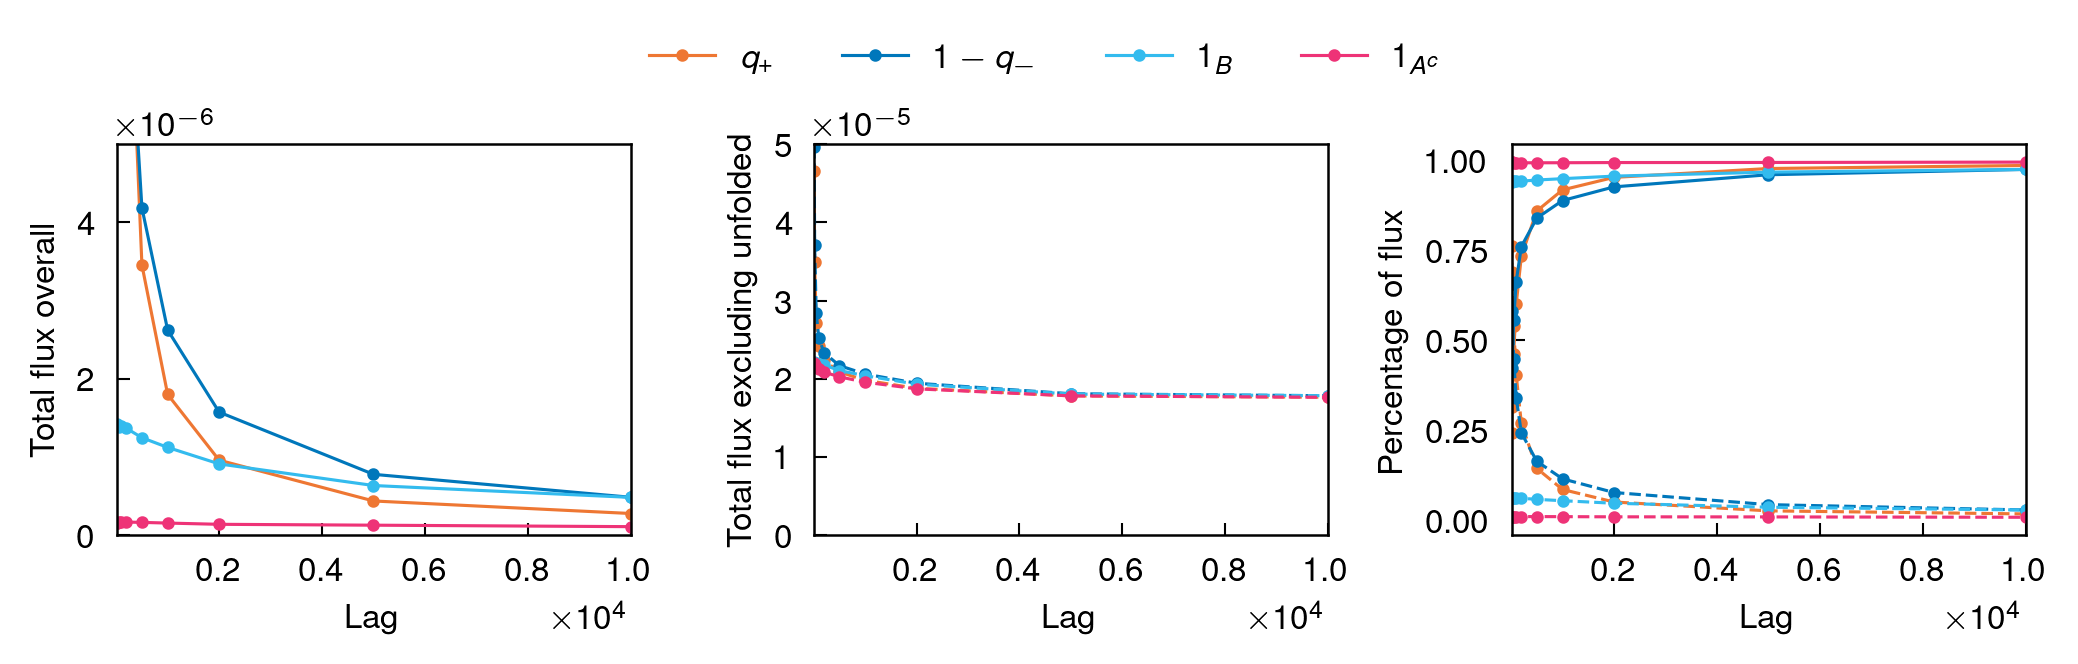

In [86]:
f, axes = plot_rates(rate91_fs2gs, rate91_fs2gs_withc)
f.savefig(f"{home_dir}/figures/flux_unfolded_t91.png", bbox_inches='tight')

In [12]:
def plot_inverse_rates(rate, rate_withc):
    f, axes = plt.subplots(ncols=3, figsize=(7, 2.5), dpi=300, sharex=True)
    for i, (r, r_withc) in enumerate(zip(rate, rate_withc)):
        axes[0].plot(rate_lags, 1 / r, "o-")
        axes[1].plot(rate_lags, 1 / r_withc, "o--")

        percent_through = r_withc / (r_withc + r)
        print(f"{percent_through[-2] * 100:.2f}")
        print(f"{(1 - percent_through[-2]) * 100:.2f}")
        axes[2].plot(rate_lags, percent_through, "o-", label="excluding unfolded")
        axes[2].plot(rate_lags, 1 - percent_through, "o--", label="overall", color=f"C{i}")

    # axes[0].set_ylim([0, 5e-6])
    # axes[1].set_ylim([0, 5e-5])
    for ax in axes:
        ax.set_xlabel("Lag")
        ax.set_xlim([10, 10000])
    axes[0].set_ylabel("Rate overall")
    axes[1].set_ylabel("Rate excluding unfolded")
    axes[2].set_ylabel("Percentage of flux")
    f.legend(
        ["$q_+$", "$1 - q_-$", r"$\mathbf{1}_B$", r"$\mathbf{1}_{A^c}$"],
        loc="center",
        ncol=4,
        bbox_to_anchor=[0.5, 1.02],
    )
    plt.tight_layout()
    return f, axes

98.80
1.20
96.99
3.01
99.02
0.98
98.73
1.27


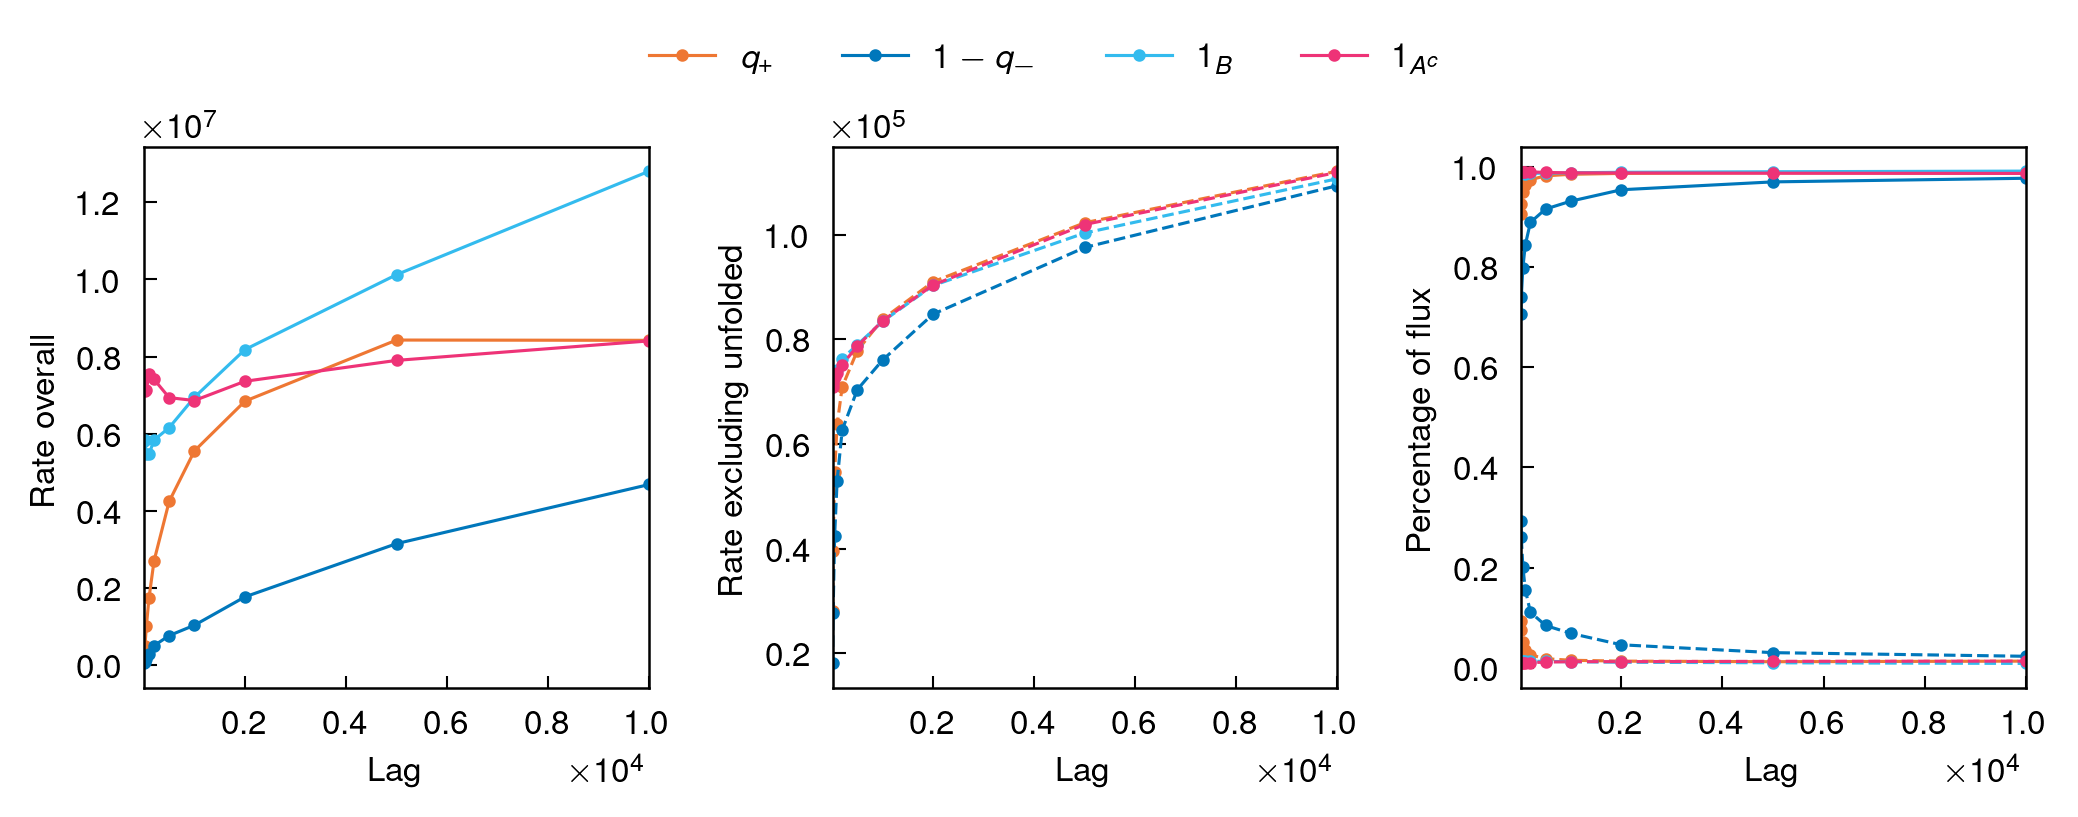

In [14]:
f, axes = plot_inverse_rates(rate87_fs2gs, rate87_fs2gs_withc)

99.35
0.65
97.18
2.82
100.54
-0.54
99.10
0.90


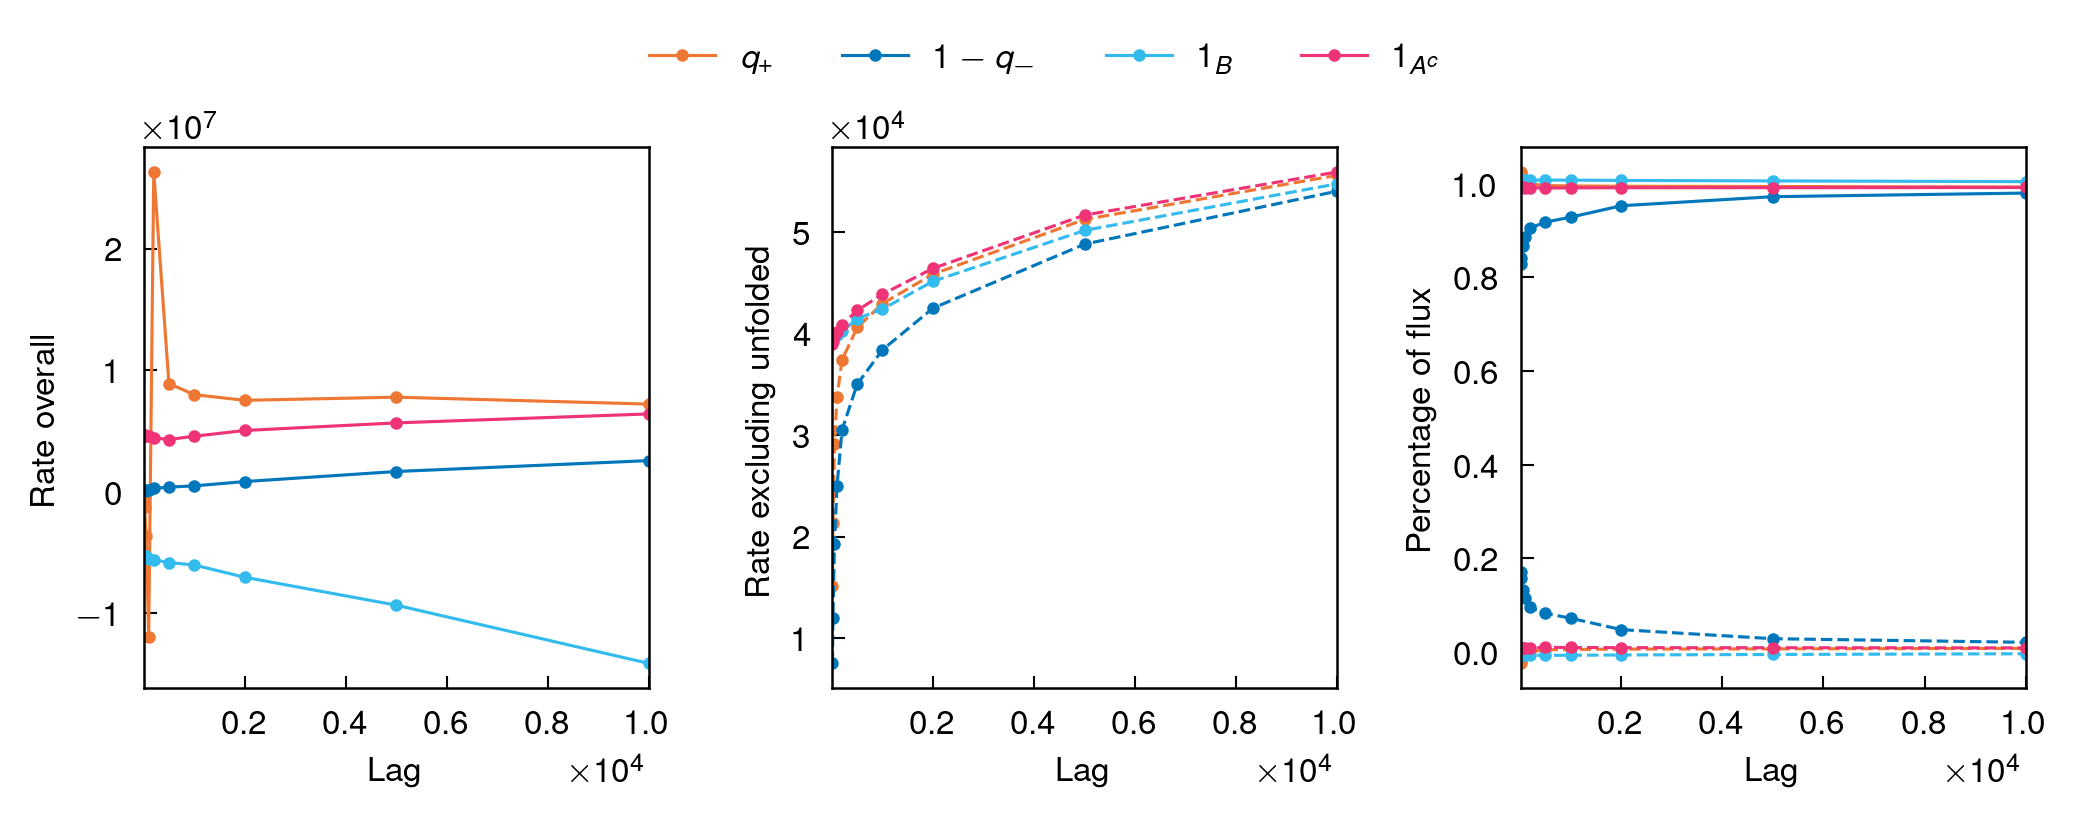

In [15]:
f, axes = plot_inverse_rates(rate89_fs2gs, rate89_fs2gs_withc)

97.61
2.39
95.88
4.12
96.61
3.39
99.30
0.70


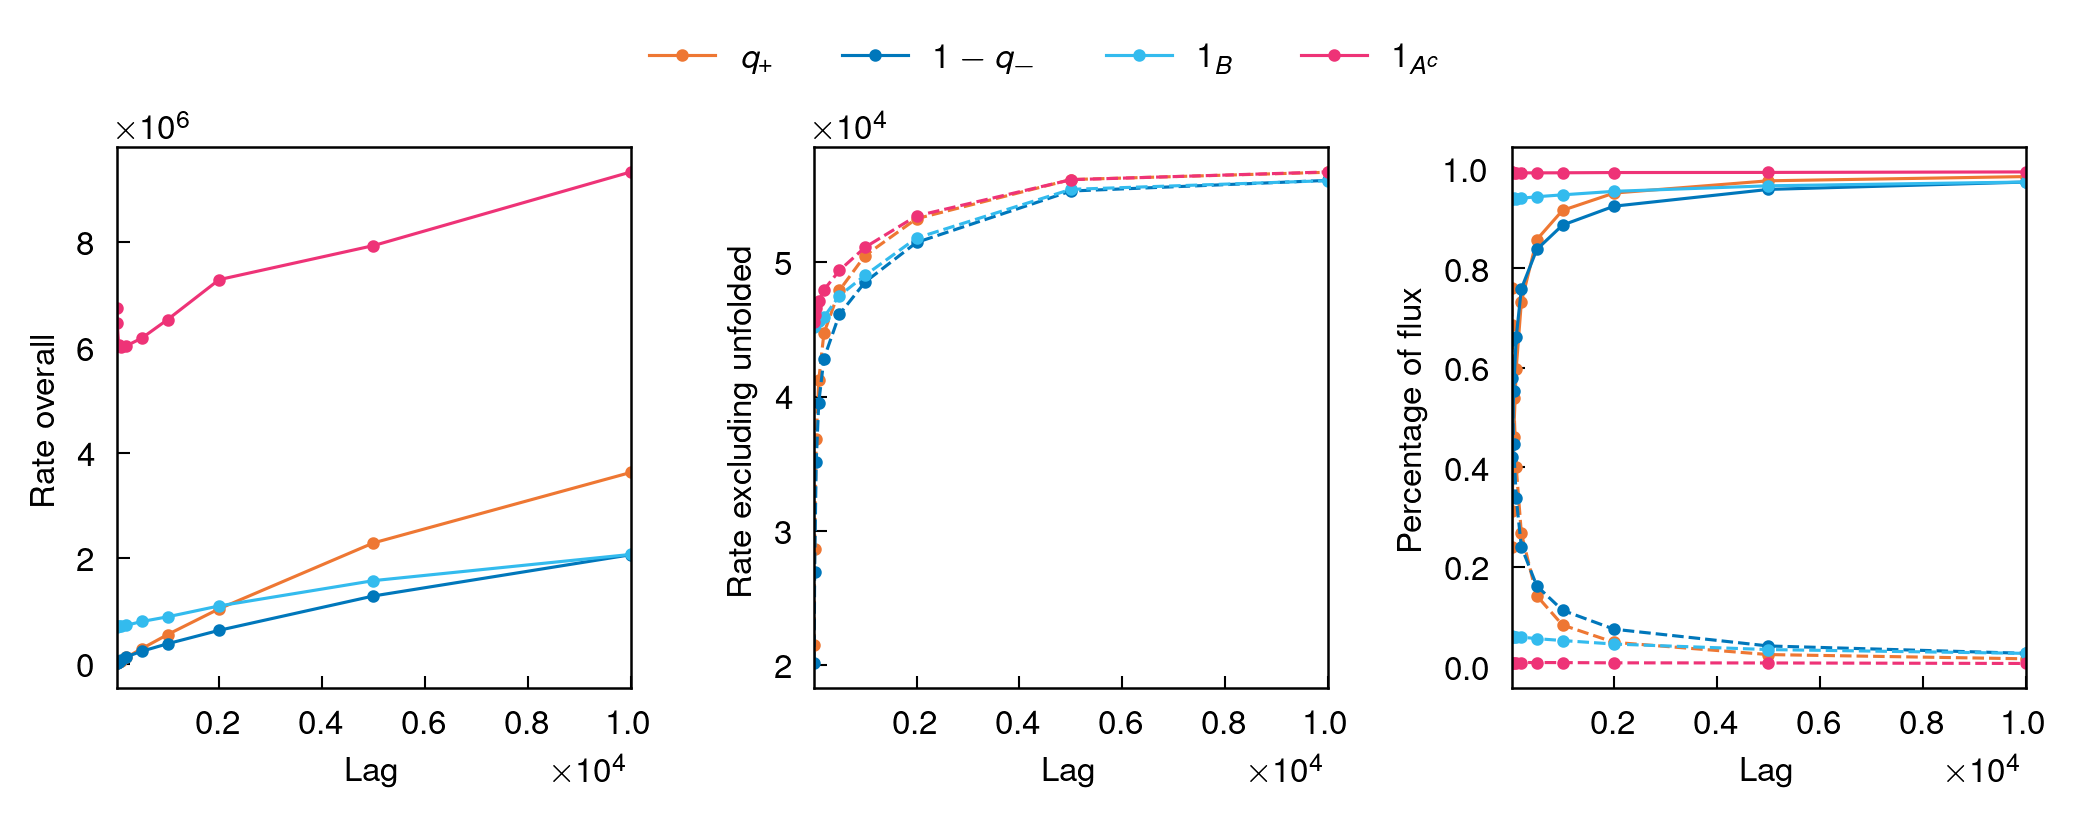

In [16]:
f, axes = plot_inverse_rates(rate91_fs2gs, rate91_fs2gs_withc)

# Check rates and committors

In [20]:
def load_cvs(base_dir, n_s, n_i):
    raw_feats, fs_qtots, f_rmsds, p_rmsds, r_rmsds = [], [], [], [], []
    for i in range(n_s):
        for j in range(n_i):
            for iso in ("cis", "trans"):
                idx = f"{i:02}_{j:02}_{iso}"
                head = f"{idx}_dga"
                if not os.path.exists(f"{base_dir}/{idx}/outputs/{head}_raw_feats.pkl"):
                    continue
                raw_feats.extend(
                    np.load(
                        f"{base_dir}/{idx}/outputs/{head}_raw_feats.pkl",
                        allow_pickle=True,
                    )
                )
                fs_qtots.extend(
                    np.load(
                        f"{base_dir}/{idx}/outputs/{head}_fs_qtots.pkl",
                        allow_pickle=True,
                    )
                )
                f_rmsds.extend(
                    np.load(
                        f"{base_dir}/{idx}/outputs/{head}_f_rmsds.pkl",
                        allow_pickle=True,
                    )
                )
                p_rmsds.extend(
                    np.load(
                        f"{base_dir}/{idx}/outputs/{head}_p_rmsds.pkl",
                        allow_pickle=True,
                    )
                )
                r_rmsds.extend(
                    np.load(
                        f"{base_dir}/{idx}/outputs/{head}_r_rmsds.pkl",
                        allow_pickle=True,
                    )
                )
    return raw_feats, fs_qtots, f_rmsds, p_rmsds, r_rmsds

In [ ]:
base_dir = f"{home_dir}/87"
raw_feats, fs_qtots, f_rmsds, p_rmsds, r_rmsds = load_cvs(base_dir, 7, 32)

c_gsa1 = np.concatenate([traj[1, :] for traj in fs_qtots])
c_gsa2 = np.concatenate([traj[3, :] for traj in fs_qtots])
c_gsb2 = np.concatenate([traj[5, :] for traj in fs_qtots])

c_fsb1 = np.concatenate([traj[0, :] for traj in fs_qtots])
c_fsb2 = np.concatenate([traj[2, :] for traj in fs_qtots])
c_fsa2 = np.concatenate([traj[4, :] for traj in fs_qtots])

c_green_arr = c_gsa2 - c_fsb2
c_blue_arr = c_gsb2 - c_fsa2
c_orange_arr = c_gsa1 - c_fsb1

p_rmsd_arr = np.asarray(p_rmsds).ravel()
f_rmsd_arr = np.asarray(f_rmsds).ravel()
r_rmsd_arr = np.asarray(r_rmsds).ravel()
in_fs = np.logical_and(
    c_green_arr < -0.78,
    np.logical_and(
        c_blue_arr < -0.83, np.logical_and(c_orange_arr < -0.75, f_rmsd_arr < 0.35)
    ),
)

in_gs = np.logical_and(
    c_green_arr > 0.67,
    np.logical_and(
        c_blue_arr > 0.88, np.logical_and(c_orange_arr > 0.75, p_rmsd_arr < 0.45)
    ),
)
in_c = (r_rmsd_arr > 0.6)

In [53]:
qp_fs2gs_withc = np.load(f"{base_dir}/dga_data/qp_fs2gs_lag1000_mem4_withc.npy")
qp_gs2fs_withc = np.load(f"{base_dir}/dga_data/qp_gs2fs_lag1000_mem4_withc.npy")
qm_fs2gs_withc = np.load(f"{base_dir}/dga_data/qm_fs2gs_lag1000_mem4_withc.npy")
qm_gs2fs_withc = np.load(f"{base_dir}/dga_data/qm_gs2fs_lag1000_mem4_withc.npy")

In [28]:
np.count_nonzero(in_c) / len(in_c)

0.21437626237146357

In [29]:
np.count_nonzero(r_rmsd_arr > 0.5) / len(in_c)

0.2759567458630826

In [30]:
np.count_nonzero(r_rmsd_arr > 0.7) / len(in_c)

0.1557662304583558

In [54]:
qp_gs2fs_arr = np.ravel(qp_gs2fs_withc)
print(qp_gs2fs_arr[in_c])
print(qp_gs2fs_arr[in_fs])
print(qp_gs2fs_arr[in_gs])

[ 0.  0.  0. ... nan nan nan]
[1. 1. 1. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]


In [43]:
qp_fs2gs_arr = np.ravel(qp_fs2gs_withc)
print(qp_fs2gs_arr[in_c])
print(qp_fs2gs_arr[in_fs])
print(qp_fs2gs_arr[in_gs])

[ 0.  0.  0. ... nan nan nan]
[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]


In [55]:
qm_gs2fs_arr = np.ravel(qm_gs2fs_withc)
print(qm_gs2fs_arr[in_c])
print(qm_gs2fs_arr[in_fs])
print(qm_gs2fs_arr[in_gs])

[1. 1. 1. ... 1. 1. 1.]
[nan  0.  0. ...  0.  0.  0.]
[1. 1. 1. ... 1. 1. 1.]


In [47]:
qp_gs2fs = np.load(f"{base_dir}/dga_data/qp_gs2fs_lag1000_mem4.npy")
qp_arr = np.ravel(qp_gs2fs)
print(qp_arr[in_c])
print(qp_arr[in_fs])
print(qp_arr[in_gs])

[0.99387423 0.9920486  0.99397553 ...        nan        nan        nan]
[1. 1. 1. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]


In [48]:
qm_gs2fs = np.load(f"{base_dir}/dga_data/qm_gs2fs_lag1000_mem4.npy")
qm_arr = np.ravel(qm_gs2fs)
print(qm_arr[in_c])
print(qm_arr[in_fs])
print(qm_arr[in_gs])

[0.         0.         0.         ... 1.22599111 1.23710647 1.2382745 ]
[nan  0.  0. ...  0.  0.  0.]
[1. 1. 1. ... 1. 1. 1.]
